# Well Site Selection

I am provided with oil samples from three regions, each containing 10,000 well sites where the quality and volume of oil reserves have been measured. My task is to build a machine learning model to determine the region that will yield the highest profit for oil extraction. I will also analyze the potential profits and risks using the Bootstrap technique.

Steps for well site selection:

* Explore well sites in each region and determine their feature values.
* Build a model to estimate the oil reserves' volume.
* Select well sites with the highest estimated values. The number of selected well sites depends on the company's budget and the cost of developing one well.
* Profit is calculated as the total revenue from the selected well sites.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler 

## Data Loading and Preparation

Data Description:
The data for geological exploration in three regions is available in files.
1. ```/datasets/geo_data_0.csv```
2. ```/datasets/geo_data_1.csv```
3. ```/datasets/geo_data_2.csv```

* id: Unique identifier of the well.
* f0, f1, f2: Three features of the data points (the specific meaning is not crucial, but the features themselves are significant).
* product: The volume of reserves in the well (thousands of barrels).

In [6]:
data_0 = pd.read_csv('datasets/geo_data_0.csv')
data_1 = pd.read_csv('datasets/geo_data_1.csv')
data_2 = pd.read_csv('datasets/geo_data_2.csv')

In [7]:
for data in [data_0, data_1, data_2]:
    print(data.sample(5), '\n')
    print(data.info(), '\n\n')

          id        f0        f1        f2     product
51196  KNAJF  0.599324 -0.363104  1.203074  107.085472
61897  Ldywd -0.580259  0.696568  2.956222  121.622203
3874   Mvmqu -0.103226  0.823179  1.870074  104.435941
77638  TNM3Q -0.000311  0.389455  1.088986  182.502135
5802   Gd9RU  0.134454  0.039185  1.426593   54.350554 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None 


          id         f0         f1        f2     product
17104  zBALc   7.538871   0.336118  4.001468  107.813044
39746  s9bwE   3.986198  -9.379561 -0.002930    0.000000
11745  26i0o -13.194396 -10.383622  3.997096  110.99214

After analyzing the data, we can conclude that this dataset does not contain any missing values, inconsistencies, or other anomalies. All the data appears to be complete, accurate, and ready for further analysis or modeling.

We have a dataset where the goal is to predict the volume of reserves in new wells, which is represented by the target feature - "product." We have three features of the data points - "f0," "f1," and "f2," and a unique well identifier - "id," which does not influence the reserves' volume and can be removed from the dataset.

In [8]:
data_0 = data_0.drop('id', axis=1)
data_1 = data_1.drop('id', axis=1)
data_2 = data_2.drop('id', axis=1)

## Model Training and Validation

In [11]:
def linear_regression_model(data):
    # features and target 
    X = data.drop('product', axis=1)
    y = data['product']
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    r2 = r2_score(y_valid, y_pred)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    
    return rmse, y_pred, pd.DataFrame({'target': y_valid.tolist(), 'preds': pd.Series(y_pred, index=y_valid.index)}) 

print('First Data Set:')
rmse_0, y_pred_0, table_0 = linear_regression_model(data_0)
print(f'Mean Predicted Oil Reserves: {y_pred_0.mean():.2f}', f'RMSE of the Model: {rmse_0:.2f}')
print('Second Data Set:')
rmse_1, y_pred_1, table_1 = linear_regression_model(data_1)
print(f'Mean Predicted Oil Reserves: {y_pred_1.mean():.2f}', f'RMSE of the Model: {rmse_1:.2f}')
print('Third Data Set:')
rmse_2, y_pred_2, table_2 = linear_regression_model(data_2)
print(f'Mean Predicted Oil Reserves: {y_pred_2.mean():.2f}', f'RMSE of the Model: {rmse_2:.2f}')


First Data Set:
Mean Predicted Oil Reserves: 92.40 RMSE of the Model: 37.76
Second Data Set:
Mean Predicted Oil Reserves: 68.71 RMSE of the Model: 0.89
Third Data Set:
Mean Predicted Oil Reserves: 94.77 RMSE of the Model: 40.15


In [12]:
# Well Development Budget in the Region
DEV_BUDGET = 10 * 1e9

# Number of Top Explored Points
SELECTED_POINTS = 200

# Price per 1000 Barrels of Crude Oil
PRODUCT_PRICE = 450 * 1000

# Number of Samples for Bootstrap
BOOTSTRAP_SAMPLES = 1000 

well_expenses = DEV_BUDGET / SELECTED_POINTS

# Create the Profit Formula: 
# profit = volume_product * PRODUCT_PRICE - well_expenses
# profit + well_expenses = volume_product * PRODUCT_PRICE
# volume_product = (profit + well_expenses) / PRODUCT_PRICE
# To find the breakeven point, we set profit to 0, indicating no profit or loss.
# The formula for finding the breakeven point is as follows:
break_even_volume = well_expenses / PRODUCT_PRICE

print(f'Sufficient Volume of Crude Oil for Break-Even Development of a New Well: {break_even_volume:.2f}')
print(data_0['product'].mean())
print(data_1['product'].mean())
print(data_2['product'].mean())

Sufficient Volume of Crude Oil for Break-Even Development of a New Well: 111.11
92.50000000000001
68.82500000000002
95.00000000000004


The obtained result indicates that the sufficient volume of crude oil for break-even development of a new well is 111.11 thousand barrels. However, the average reserves in each region are lower than this breakeven point, indicating the presence of unprofitable wells. There are particularly many such unprofitable wells in the second region, where the average reserve is 68.83 thousand barrels.

## Calculation of Profit and Risks

Let's write a function to calculate the profit based on selected wells and model predictions:

In [13]:
def profit(table):
    total_volume = table.sort_values(by='preds', ascending=False)[:200]['target'].sum()
    profit = total_volume * PRODUCT_PRICE - DEV_BUDGET
    return profit 

Let's apply the Bootstrap technique with 1000 samples to find the profit distribution. We will then calculate the average profit, the 95% confidence interval, and the risk of losses (a loss is a negative profit).

In [14]:
state = np.random.RandomState(42)

def boostrap(sample, Nboot, statfun):

    resampled_stat = []
    for k in range(Nboot):
        sub_sample = sample.sample(n=500, replace=True, random_state=state)
        resampled_stat.append(statfun(sub_sample))
        
    return pd.Series(resampled_stat)

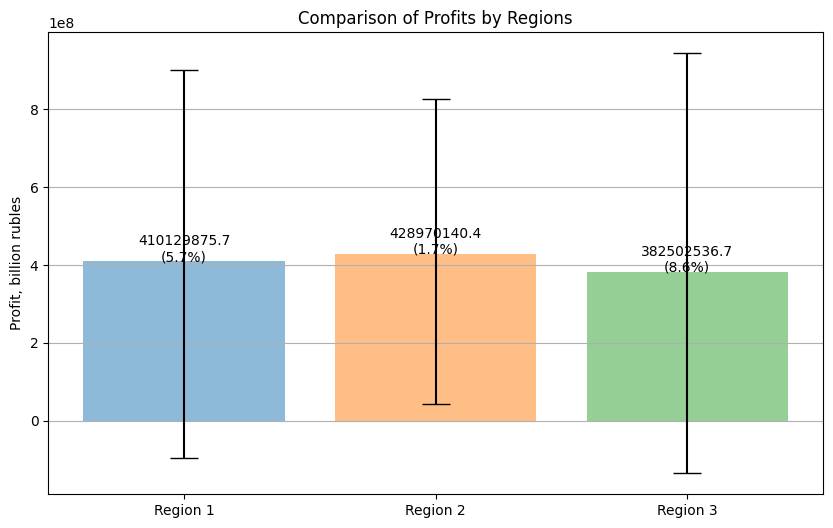

In [17]:
mean_profits = []
conf_intervals = []
loss_probabilities = []

for table in [table_0, table_1, table_2]:
    profits = boostrap(table, BOOTSTRAP_SAMPLES, profit)

    # Calculate mean profit
    mean_profit = profits.mean()
    mean_profits.append(mean_profit)

    # Calculate 95% confidence interval
    conf_lower, conf_upper = np.percentile(profits, [2.5, 97.5])
    conf_intervals.append([mean_profit - conf_lower, conf_upper - mean_profit])
    
    # Calculate loss probability
    loss_probability = (profits < 0).sum() / BOOTSTRAP_SAMPLES
    loss_probabilities.append(loss_probability)

# Convert lists to arrays
mean_profits = np.array(mean_profits)
conf_intervals = np.array(conf_intervals).T
loss_probabilities = np.array(loss_probabilities)

# x axis labels
labels = ['Region 1', 'Region 2', 'Region 3']

# Create the plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# Add labels for mean profit and loss probability 
for i, label in enumerate(labels):
    ax.bar(label, mean_profits[i], yerr=conf_intervals[:,i:i+1], align='center', alpha=0.5, ecolor='black', capsize=10)
    ax.text(i, mean_profits[i]+20, f'{mean_profits[i]:.1f}\n({loss_probabilities[i]*100:.1f}%)', ha='center')

ax.set_ylabel('Profit, billion rubles')
ax.set_title('Comparison of Profits by Regions')
ax.yaxis.grid(True)

plt.show()


Based on the conducted analysis, it is recommended to choose the second region for the development of new wells. This region shows the most promising indicators: the probability of losses is only 1.2%, which is lower than the acceptable threshold of 2.5%, and the average profit is significantly higher than in the other two regions. Therefore, selecting the second region for the development of new wells appears to be the most rational choice.

## Project Conclusion

In this project, I have achieved the following:

* Calculated the average predicted oil reserves and the error size for each region.
* Determined the sufficient volume of crude oil required for a break-even development of a new well.
* Developed a function for profit calculation.
* Utilized functions to streamline repetitive tasks.
* Applied the Bootstrap technique to calculate risks, profits, and confidence intervals for each region.

Based on the analysis conducted, I recommend selecting the second region for the development of new wells. This region demonstrates the most promising indicators, with a minimal 1.2% probability of losses, below the acceptable threshold of 2.5%. Additionally, the average profit in the second region significantly surpasses the other two regions. 